In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 📥 Carga de datos desde archivo exportado
import numpy as np

# Ruta del archivo .txt exportado desde Logger Pro
ruta_archivo = "data/20hz.txt"

# Cargar el archivo (ajustar skip_header si es necesario)
data = np.genfromtxt(ruta_archivo, skip_header=7)

# Verifica las primeras filas
print("Primeras filas del archivo completo:")
print(data[:5])

Primeras filas del archivo completo:
[[ 0.05        0.5602905  -0.00381111 -0.11695877  0.          0.01939255
   1.34454994]
 [ 0.1         0.5602905  -0.00905139 -0.13941785  0.          0.06787392
   1.75825762]
 [ 0.15        0.5596045  -0.015778   -0.17546991  0.          0.18035069
   2.15580484]
 [ 0.2         0.5589185  -0.02601083 -0.21578299  0.01745329  0.31028076
   2.10947819]
 [ 0.25        0.5572035  -0.04011194 -0.20406383  0.03490659  0.38785094
   2.01036073]]


In [3]:
# 🔍 Acotado de datos por intervalo de tiempo
# Elegimos un intervalo donde la señal de aceleración sea aproximadamente periódica

t_total = data[:, 0]  # columna de tiempo

# Define el rango de tiempo (ajustable por el alumno)
t_min = 0.0
t_max = 20

# Crear máscara y aplicar
mascara = (t_total >= t_min) & (t_total <= t_max)
datos = data[mascara]

# Separar columnas
t, x, v, a, theta, omega, alpha = datos.T


print(f"Datos acotados entre t = {t_min}s y {t_max}s. Total de muestras: {len(t)}")

Datos acotados entre t = 0.0s y 20s. Total de muestras: 400


[]

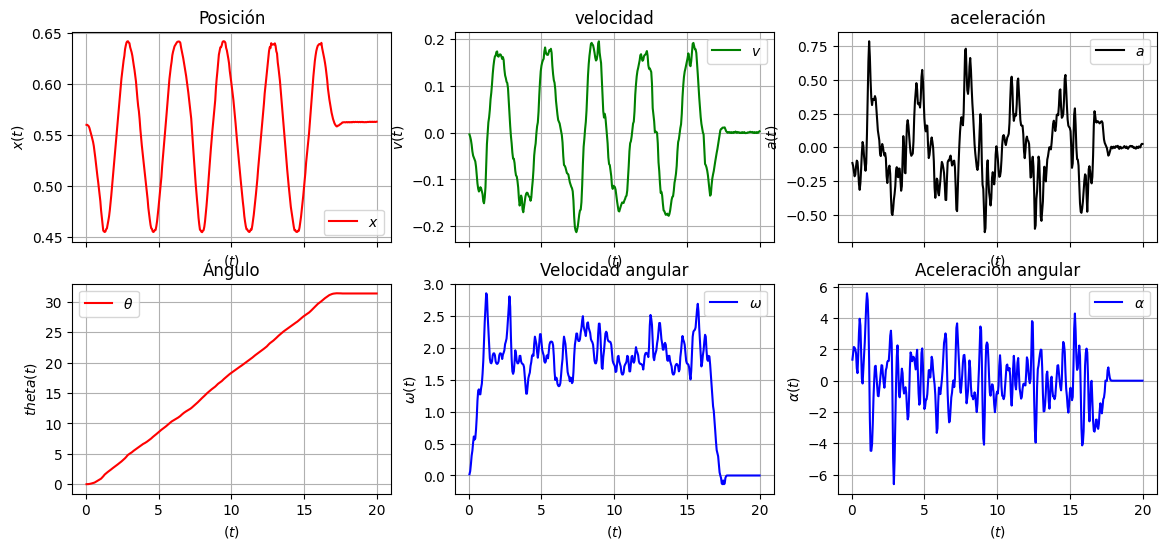

In [4]:
# Graficar
fig, axs = plt.subplots(2, 3, figsize=(14, 6), sharex=True)


axs[0,0].plot(t, x, color='red',label=r"$x$")
axs[0,0].set_ylabel(r'$x(t)$')
axs[0,0].set_xlabel(r'$(t)$')
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set_title(r'Posición')

axs[0,1].plot(t, v, color='green',label=r"$v$")
axs[0,1].set_ylabel(r'$v(t)$')
axs[0,1].set_xlabel(r'$(t)$')
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set_title(r'velocidad')

axs[0,2].plot(t, a, color='black',label=r"$a$")
axs[0,2].set_ylabel(r'$a(t)$')
axs[0,2].set_xlabel(r'$(t)$')
axs[0,2].legend()
axs[0,2].grid()
axs[0,2].set_title(r'aceleración')

axs[1,0].plot(t, theta, color='red',label=r"$\theta$")
axs[1,0].set_ylabel(r'$theta(t)$')
axs[1,0].set_xlabel(r'$(t)$')
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set_title(r'Ángulo')

axs[1,1].plot(t, omega, color='blue',label=r"$\omega$")
axs[1,1].set_ylabel(r'$\omega(t)$')
axs[1,1].set_xlabel(r'$(t)$')
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set_title(r'Velocidad angular')

axs[1,2].plot(t, alpha, color='blue',label=r"$\alpha$")
axs[1,2].set_ylabel(r'$\alpha(t)$')
axs[1,2].set_xlabel(r'$(t)$')
axs[1,2].legend()
axs[1,2].grid()
axs[1,2].set_title(r'Aceleración angular')

plt.plot()

Ajuste: A0 = 0.5531056139916446, A = 0.09386990156703057, phi = 1.5342507304447637


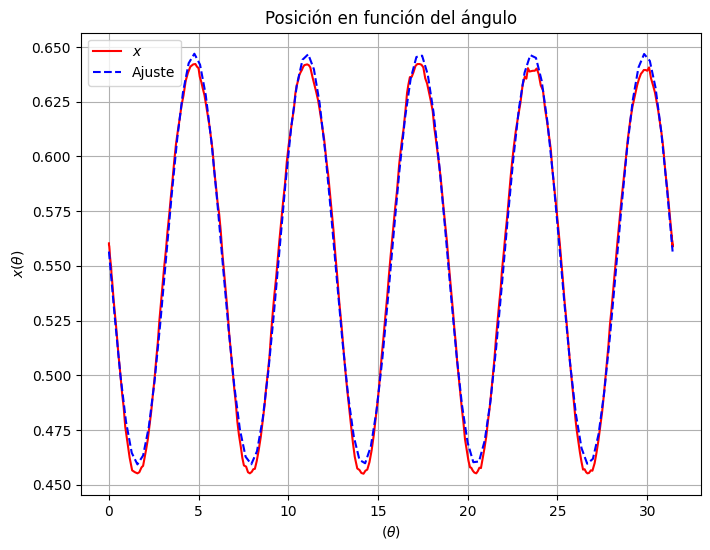

In [5]:
# Graficar la posicion en función del angulo 
fig, axs = plt.subplots(1, 1, figsize=(8, 6), sharex=True)
axs.plot(theta, x, color='red',label=r"$x$")
axs.set_ylabel(r'$x(\theta)$')
axs.set_xlabel(r'$(\theta)$')
axs.legend()
axs.grid()
axs.set_title(r'Posición en función del ángulo')
plt.plot()


# Ajuste de curva x = A0 + A * cos(theta + phi)
from scipy.optimize import curve_fit
def modelo(theta, A0, A, phi):
    return A0 + A * np.cos(theta + phi)
# Ajustar el modelo a los datos
popt, pcov = curve_fit(modelo, theta, x, p0=[0, 1, 0], bounds=([-np.inf, -np.inf, -np.pi], [np.inf, np.inf, np.pi]))
# Obtener los parámetros ajustados
A0, A, phi = popt
print(f"Ajuste: A0 = {A0}, A = {A}, phi = {phi}")
# Graficar el ajuste
theta_fit = np.linspace(np.min(theta), np.max(theta), 100)
x_fit = modelo(theta_fit, *popt)
axs.plot(theta_fit, x_fit, color='blue', label='Ajuste', linestyle='--')
axs.legend()
plt.show()